In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

# WAV - Audio data in uni-axis (mono)

Check audio specs

In [3]:
from caits.loading import wav_specs_check

In [4]:
audio_params = wav_specs_check("data/yes.wav")

Information returned from the `wav_specs_check`:

* nchannels: number of audio channels (1 for mono, 2 for stereo)
* sampwidth: sample width in bytes
* framerate: sampling frequency
* nframes: number of audio frames
* comptype: compression type ('NONE' is the only supported type)
* compname: Human-readable version of `comptype`. Usually 'not compressed' parallels 'NONE'

In [5]:
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

In [6]:
wav_specs_check("data/yes.wav", print_base=True)

Sample rate: 16000 Hz
Mono


{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

Load audio

In [7]:
from caits.loading import wav_loader

In [8]:
audio_df, sr = wav_loader("data/yes.wav")

In [9]:
print(type(audio_df))
print(audio_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['ch_1'], dtype='object')


In [10]:
print(audio_df.shape)

(16000, 1)


In [11]:
audio_load_arr = audio_df["ch_1"].values
print(audio_load_arr.shape)

(16000,)


In [12]:
audio_df.head()

,ch_1
0,-0.000763
1,-0.000824
2,-0.000732
3,-0.000549
4,-0.000427


In [13]:
print(audio_df.values.shape)
print(audio_df.to_numpy().shape)

(16000, 1)
(16000, 1)


### Plotting

In [14]:
from caits.visualization import plot_signal

Plot signal in samples

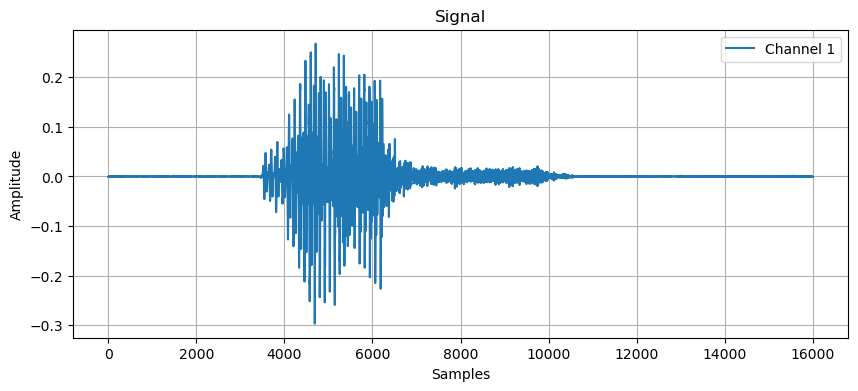

In [15]:
plot_signal(
    sig=audio_df.values, 
    sr=sr, 
    return_mode=False
)

Plot signal in seconds

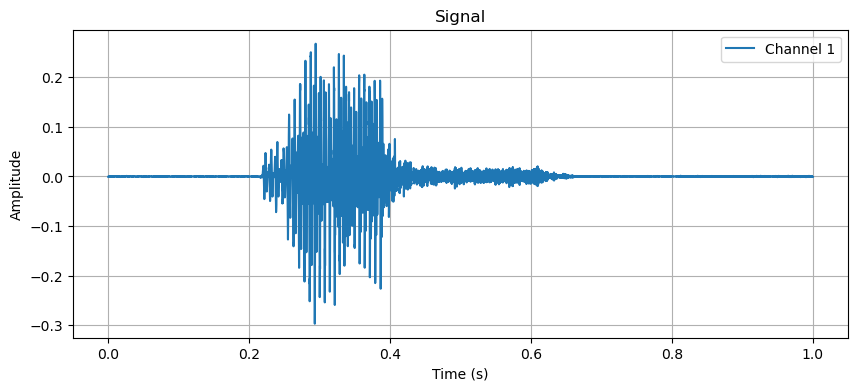

In [16]:
plot_signal(
    sig=audio_df.values, 
    sr=sr, 
    mode="time", 
    return_mode=False
)

# Statistical features

In [17]:
from caits.fe import std_value, variance_value, mean_value, median_value
from caits.fe import max_value, min_value, kurtosis_value, sample_skewness
from caits.fe import signal_length
from caits.fe import central_moments
from caits.fe import power_spectral_density

In [18]:
# insert as an input the array in dimensions (X,), meaning as a vector (not the df.values which export a matrix (X, 1))
print("mean_value: ", mean_value(audio_load_arr))
print("median_value: ", median_value(audio_load_arr))
print("std_value: ", std_value(audio_load_arr))
print("variance_value: ", variance_value(audio_load_arr))
print("max_value: ", max_value(audio_load_arr))
print("min_value: ", min_value(audio_load_arr))
print("signal_length: ", signal_length(audio_load_arr, fs=sr))
print("power_spectral_density: ", power_spectral_density(
    audio_load_arr, fs=sr, nperseg_th=2000, noverlap_th=1000 , export="dict"
))

mean_value:  9.441375732421875e-07
median_value:  0.0
std_value:  0.036245229556322686
variance_value:  0.0013137166655905277
max_value:  0.26763916015625
min_value:  -0.296905517578125
signal_length:  1.0
power_spectral_density:  {'PSD_0-200': 0.006763197656953995, 'PSD_300-425': 0.2708202138607778, 'PSD_500-650': 0.10523390755280201, 'PSD_950-1150': 0.004440294106790439, 'PSD_1400-1800': 0.005967104557760291, 'PSD_2300-2400': 0.0009330044335501731, 'PSD_2850-2950': 5.54299139453166e-05, 'PSD_3800-3900': 1.6602469314695523e-05}


In [19]:
kurtosis_value(audio_df.values)

array([16.73830387])

In [20]:
sample_skewness(audio_df.values)

array([0.0709207])

In [21]:
central_moments(audio_df.values)

array([[1.00000000e+00],
       [0.00000000e+00],
       [1.31371667e-03],
       [3.37664088e-06],
       [3.40653809e-05]])